Réalisé par:
<div style="margin-left: 5px; margin-top: 5px;">
    - <b>BANANI Mohamed Amine</b>
</div>

In [1]:
import cv2
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 

### - Importation de l'image

In [2]:
# read the image
image = plt.imread(r"C:\M1_BDIA\Pr_Es-saady\EXAM_FEATURES\base d'images\Mouche mineuse\1.jpg")

## 1- Pré-traitements

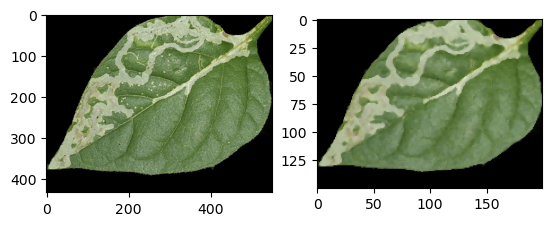

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

# Redimensionner l'image à une taille standard
standard_size = (200, 150)
resized_image = cv2.resize(image, standard_size)

# Appliquer un filtrage médian pour réduire le bruit
preprocessed_image = cv2.medianBlur(resized_image, 3)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(image)
f.add_subplot(1,2, 2)
plt.imshow(preprocessed_image)
plt.show(block=True)

In [4]:
cv2.imwrite('preprocessed_image.jpg', preprocessed_image)

True

## 2- Segmentation

+ Conversion de l'espace de couleur RGB vers Lab*:

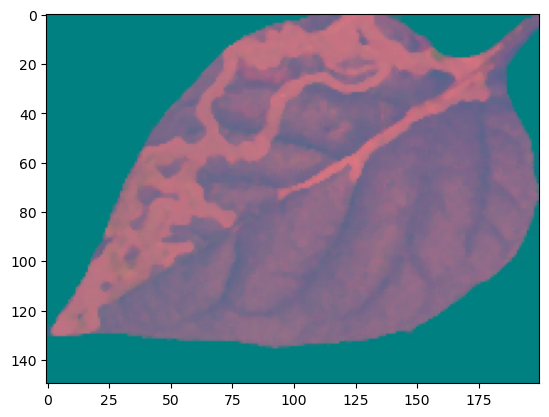

In [5]:
# Convert the image to the L*a*b color space
lab_image = cv2.cvtColor(preprocessed_image, cv2.COLOR_BGR2LAB)
plt.imshow(lab_image)

+ Classifier les couleurs des objets avec k-means:

In [6]:
import numpy as np
from sklearn.cluster import KMeans

# reformater les données pour être utilisées par k-means
data = lab_image.reshape((lab_image.shape[0] * lab_image.shape[1], 3))

# définir le nombre de clusters pour k-means
k = 3

# faire la classification k-means
kmeans = KMeans(n_clusters=k).fit(data)

+ Etiqueter chaque pixel avec les résultats de k-means:

In [7]:
labels = kmeans.predict(data)

# redimensionner les étiquettes pour être de la même taille que l'image
labels = labels.reshape(lab_image.shape[0], lab_image.shape[1])

+ Créer les images de segmentation :

In [8]:
# initialiser une liste pour les images de segmentation
segmented_images = []

# itérer à travers chaque cluster
for i in range(k):
    # créer une image binaire avec les pixels appartenant à ce cluster
    binary_img = np.zeros(labels.shape, dtype=np.uint8)
    binary_img[labels == i] = 255

    # ajouter cette image à la liste des images de segmentation
    segmented_images.append(binary_img)

+ Sélectionner le cluster contenant la zone de la lésion :

In [9]:
# déterminer le cluster qui contient la plus grande quantité de pixels blancs
max_cluster = 0
max_white_pixels = 0
for i, img in enumerate(segmented_images):
    white_pixels = np.sum(img == 255)
    if white_pixels > max_white_pixels:
        max_white_pixels = white_pixels
        max_cluster = i

# sélectionner l'image correspondant à ce cluster
lesion_segmented_img = segmented_images[max_cluster]

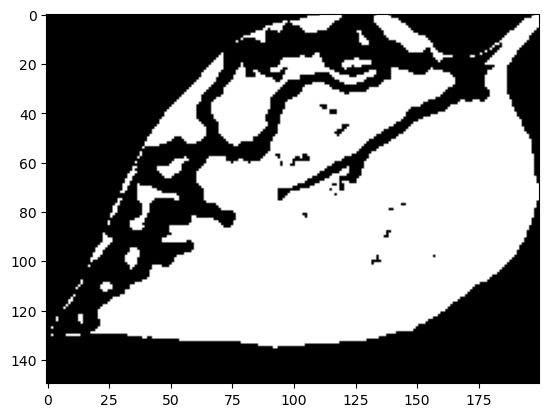

In [10]:
plt.imshow(lesion_segmented_img, cmap="gray")

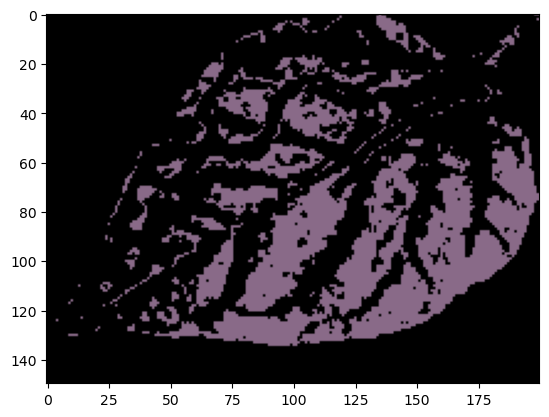

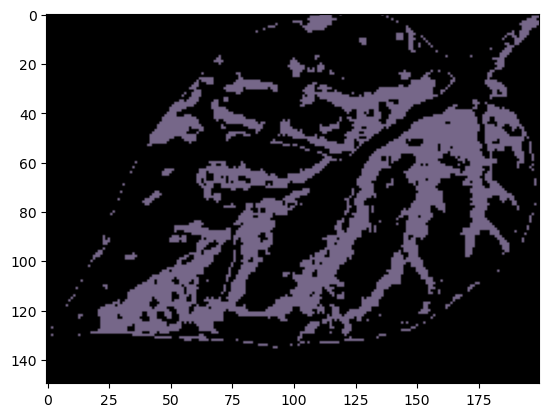

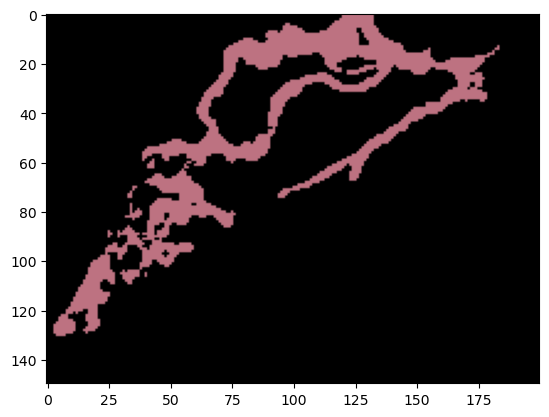

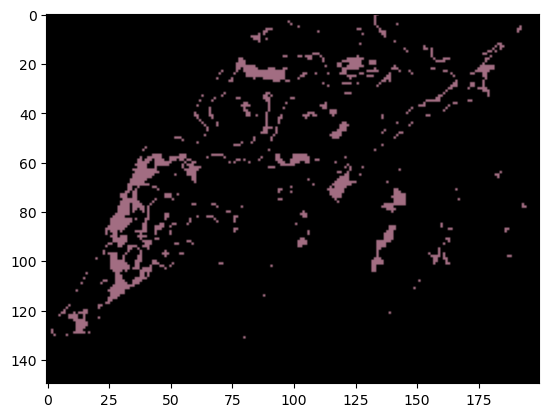

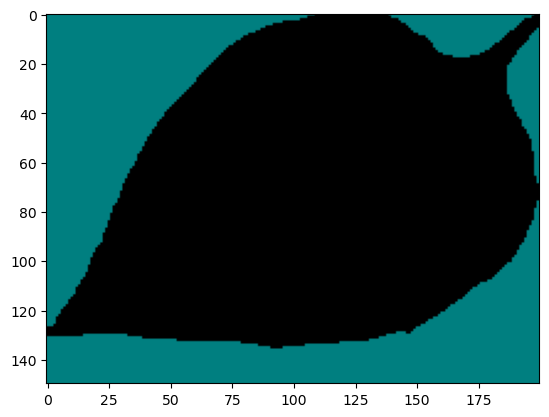

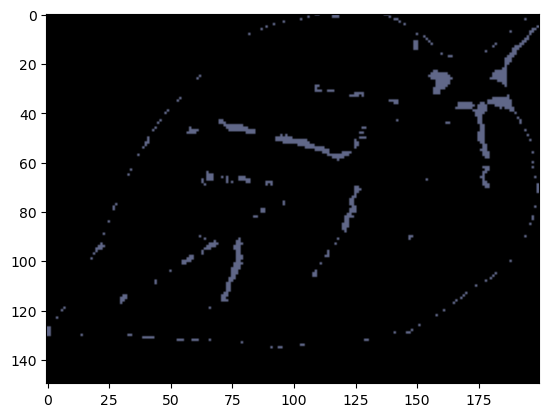

In [11]:
import cv2
import numpy as np

# Charger l'image en couleur L*a*b*
# img = cv2.imread("lab_image.jpg")

# Convertir l'image en un format numérique numpy
img_reshaped = lab_image.reshape((-1, 3))
img_reshaped = np.float32(img_reshaped)

# Définir le nombre de clusters (K)
K = 6

# Définir les critères de terminaison
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Exécuter l'algorithme K-means
ret, label, center = cv2.kmeans(img_reshaped, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Étiqueter chaque pixel de l'image en utilisant les résultats de K-means
label_img = label.reshape((lab_image.shape[0], lab_image.shape[1]))

# Boucle sur chaque cluster pour créer les images de segmentation
for i in range(K):
    segmented_img = np.zeros((lab_image.shape[0], lab_image.shape[1], 3), dtype=np.uint8)
    segmented_img[label_img == i] = center[i].astype(np.uint8)

    # Sauvegarder l'image de segmentation
#     cv2.imwrite("segmented_image_" + str(i) + ".jpg", segmented_img)
    plt.imshow(segmented_img)
    plt.show()
    

<b>Remarque: </b> D'aprés plusieurs essaies avec l'algorithme K-means, on a trouvé le nombre du cluster convenable est 3.

Zone de la lésion extraite.


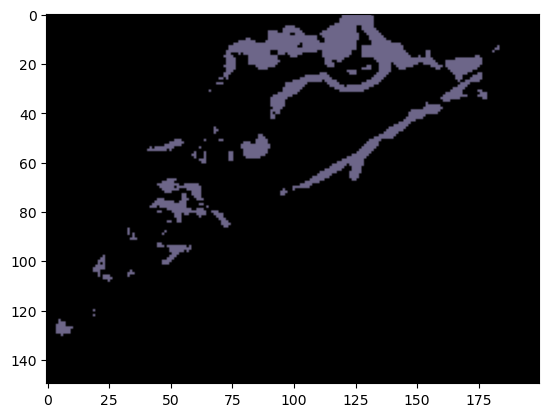

In [12]:
# Convertir l'image en un format numérique numpy
img_reshaped = lab_image.reshape((-1, 3))
img_reshaped = np.float32(img_reshaped)

# Définir le nombre de clusters (K)
K = 6

# Définir les critères de terminaison
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Exécuter l'algorithme K-means
ret, label, center = cv2.kmeans(img_reshaped, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Étiqueter chaque pixel de l'image en utilisant les résultats de K-means
label_img = label.reshape((lab_image.shape[0], lab_image.shape[1]))

# Compter le nombre de pixels pour chaque cluster
pixel_counts = [0] * K
for i in range(K):
    pixel_counts[i] = np.sum(label_img == i)
# Déterminer l'index du cluster le plus important
min_index = np.argmin(pixel_counts)
# Sélectionner le cluster contenant la zone de la lésion
lesion_cluster = center[min_index].astype(np.uint8)
segmented_img1 = np.zeros((lab_image.shape[0], lab_image.shape[1], 3), dtype=np.uint8)
segmented_img1[label_img ==min_index] = center[i].astype(np.uint8)
print("Zone de la lésion extraite.")
cv2.imwrite("segmented_image.jpg", segmented_img1)
plt.imshow(segmented_img1)
plt.show()

## 3- Extraction de caractéristiques
- <font style = "font-size : 20px"> 3-1 Primitives de la couleur </font>

In [13]:
def color_moments(image):
    # Calculer la couleur moyenne
    mean = np.mean(image, axis=(0, 1))

    # Calculer l'écart type
    deviation = np.std(image, axis=(0, 1))

    # Calculer l'asymétrie
    skewness = np.mean(np.power(image - mean, 3), axis=(0, 1)) / np.power(deviation, 3)

    return mean, deviation, skewness

In [14]:
import cv2
import numpy as np

# Convertir l'image dans l'espace colorimétrique HSV
hsv = cv2.cvtColor(segmented_img1, cv2.COLOR_BGR2HSV)

# Diviser l'image en ses canaux de couleur
h, s, v = cv2.split(hsv)

# Calculer les moments de couleur pour chaque canal
h_mean, h_deviation, h_skewness = color_moments(h)
s_mean, s_deviation, s_skewness = color_moments(s)
v_mean, v_deviation, v_skewness = color_moments(v)

# afficher les résultats
print("Moyenne de la Teinte:", h_mean)
print("Ecart type de la Teinte:", h_deviation)
print("Asymétrie de la Teinte:", h_skewness)
print("------------------------------------------------")
print("Moyenne de la Saturation:", s_mean)
print("Ecart type de la Saturation:", s_deviation)
print("Asymétrie de la Saturation:", s_skewness)
print("------------------------------------------------")
print("Moyenne de la Valeur:", v_mean)
print("Ecart type de la Valeur:", v_deviation)
print("Asymétrie de la Valeur:", v_skewness)

Moyenne de la Teinte: 11.6232
Ecart type de la Teinte: 43.44350379239686
Asymétrie de la Teinte: 3.470106847744258
------------------------------------------------
Moyenne de la Saturation: 4.342
Ecart type de la Saturation: 16.228895094860896
Asymétrie de la Saturation: 3.4701068477442583
------------------------------------------------
Moyenne de la Valeur: 9.1516
Ecart type de la Valeur: 34.20551735378373
Asymétrie de la Valeur: 3.4701068477442583


- <font style = "font-size : 20px"> 3-2 Primitives de la texture </font>

In [15]:
from skimage import feature

-    Énergie (float): Énergie de l'image
-   Contraste (float): Contraste de l'image
-    Corrélation (float): Corrélation de l'image
-    Homogénéité (float) : Homogénéité de l'image

In [16]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

glcm = feature.graycomatrix(gray_image, [1], [0], levels=256)

# Calculer les attributs de la texture
contrast = feature.graycoprops(glcm, 'contrast')
homogeneity = feature.graycoprops(glcm, 'homogeneity')
correlation = feature.graycoprops(glcm, 'correlation')
energy = feature.graycoprops(glcm, 'energy')

print("Energie:", energy[0][0])
print("Contraste:", contrast[0][0])
print("Homogénéité:", homogeneity[0][0])
print("Correlation:", correlation[0][0])


Energie: 0.326894038697005
Contraste: 245.92197444860906
Homogénéité: 0.39158095084452277
Correlation: 0.9721795690022816


- <font style = "font-size : 23px"> 3-3 Primitives de la forme </font>

In [17]:
# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Définir un seuil de luminosité
threshold_value = 128
# Appliquer le seuil à l'image en niveaux de gris
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
# Enregistrer l'image binaire
cv2.imwrite('binary_image.jpg', binary_image)

def calculate_area(binary_image):
    return cv2.countNonZero(binary_image)

def calculate_perimeter(gray_image):
    contours, _ = cv2.findContours(gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return int(cv2.arcLength(contours[0], True))
  

def calculate_circularity(image, threshold=127):
    # Convertir l'image en niveaux de gris
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Appliquer un seuillage binaire pour extraire le contour de l'objet
    _, binary = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    
    # Trouver les contours dans l'image binaire
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sélectionner le contour le plus grand (correspondant à l'objet)
    cnt = max(contours, key=cv2.contourArea)
    
    # Calculer la circonférence et le périmètre de l'objet
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    circumference = 2 * np.pi * radius
    perimeter = cv2.arcLength(cnt, True)
    
    # Calculer la circularité en utilisant le rapport entre la circonférence et le périmètre
    circularity = circumference / perimeter
    
    return circularity

def calculate_complexity(perimeter,area):
    # Calculate Complexity
    complexity = (perimeter ** 2) / area
    print("Complexité :",complexity)

In [18]:
area=calculate_area(binary_image)
print("Aire :",area)

perimeter=calculate_perimeter(binary_image)
print("Perimètre :",perimeter)

circularity=calculate_circularity(image, threshold=127)
print("Circularité :",circularity)

calculate_complexity(perimeter,area)

Aire : 59805
Perimètre : 2
Circularité : 0.31753959256573777
Complexité : 6.688403979600368e-05
